# 1.2 Electron Transport in molec. dingenskirchens

In [188]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt b: Implementing Gauss Seidel & Testing
Also basically wird mit dem Gauss Seidel Algorythmus ein Gleichungssystem der Form Ax=b für x gelöst, wobei A die zufäll

(1000, 1000)
(1000,)


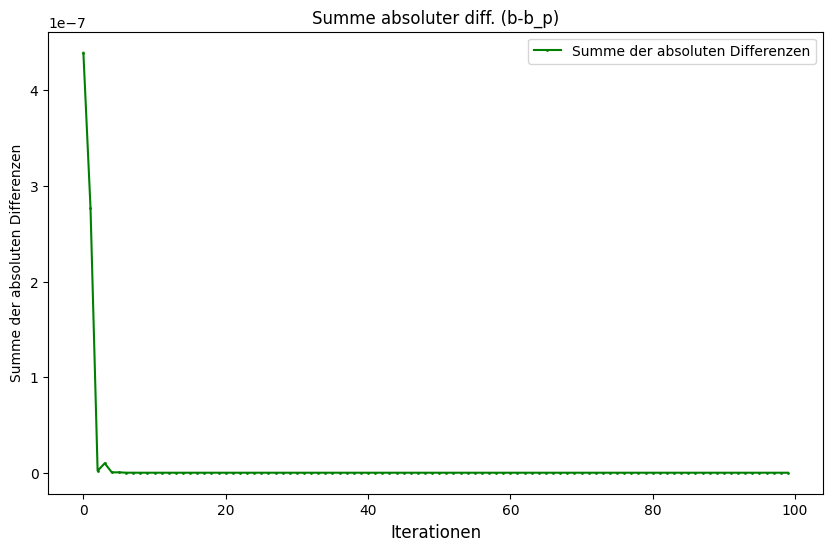

In [189]:
#Erstellen einer zufälligen 100x100 Matrix A und Vektor b, die dem Gauss Seidel Verfahren genügen
#strikte Diagonale Dominanz der Matrix, was die Konvergenz garantiert, oder die Symmetrie und positive Definitheit der Matrix
X = np.random.rand(1000, 1000)
A= X@X.T 
np.fill_diagonal(A, np.sum(np.abs(A), axis=1) + 1)  #Diagonalelemente setzen, um strikte Diagonaldominanz zu garantieren
b = np.random.rand(1000)


print(np.shape(A))
print(np.shape(b)) #XD

#Start Gauss-Seidel-Verfahrens
def gauss_seidl(A,b):
    diff=[]
    x = np.zeros_like(b)
    n=len(b)

    for it_count in range(100):
        x_neu= np.copy(x)
        for i in range(n):
            sum1= A[i,:i] @x_neu[:i]
            sum2= A[i,i+1:] @ x[i+1:]
            x_neu[i]= (b[i]-sum1-sum2)/A[i,i] #Formel aus Wikipedia
            diff_i= np.abs(x_neu[i]-x[i]) #Berechnung der Differenz, aber mit x, weil wenns ichs mit b mache dauerts ewig
        diff.append(diff_i)
        x= x_neu
    return x,diff

x,diff= gauss_seidl(A,b)
# Plot der Differenzen
plt.figure(figsize=(10, 6))
plt.plot(diff, marker='o', linestyle='-', color='g', label='Summe der absoluten Differenzen',markersize=1)
plt.title('Summe absoluter diff. (b-b_p)')
plt.xlabel('Iterationen', fontsize=12)
plt.ylabel('Summe der absoluten Differenzen')
plt.legend()
plt.show()